In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
recent_date

'2017-08-23'

In [10]:
dt.datetime.strptime(recent_date, '%Y-%m-%d') - dt.timedelta(365)

datetime.datetime(2016, 8, 23, 0, 0)

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
from datetime import date
from dateutil.relativedelta import relativedelta
date_oneyear_from_lastdate = date(2017,8,23)+relativedelta(years=-1)
print(f'The date one year from the last date in dataset is : {date_oneyear_from_lastdate}')

The date one year from the last date in dataset is : 2016-08-23


In [12]:
# Perform a query to retrieve the data and precipitation scores
results= session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date > date_oneyear_from_lastdate).order_by(Measurement.date).all()
results

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results)
df.set_index('date', inplace=True, )
df.head(10)

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
2016-08-24,2.15
2016-08-24,1.45
2016-08-25,0.08
2016-08-25,0.08


In [14]:
# Sort the dataframe by date
sort_df = df.sort_index(ascending=True)
sort_df

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


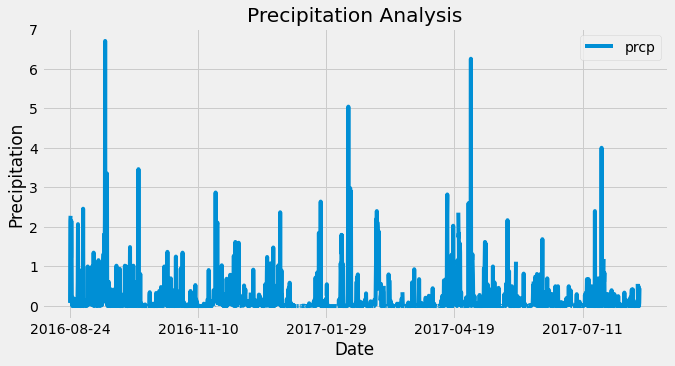

In [29]:
# Use Pandas Plotting with Matplotlib to plot the data
sort_df.plot(title="Precipitation Analysis", figsize=(10,5)).set_xlabel('Date')
plt.ylabel('Precipitation')
plt.savefig("Images/PrecipitationAnalysis.png")
plt.show()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sort_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number stations in the dataset
total_stations= session.query(Station).count()
print(f'The total number of stations in the dataset is : {total_stations}')

The total number of stations in the dataset is : 9


In [18]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                  group_by(Measurement.station).\
                  order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0]
results = session.query(func.avg(Measurement.tobs), func.max(Measurement.tobs), func.min(Measurement.tobs)).\
          filter(Measurement.station == most_active_station).all()
print(f'The most active station ID is: {most_active_station}')
print(f'The lowest temperature here is: {results[0][2]} degrees Farenheit.')
print(f'The highest temperature here is: {results[0][1]} degrees Farenheit.')
print(f'The average temperature here is: {results[0][0]:.3f} degrees Farenheit.')

The most active station ID is: USC00519281
The lowest temperature here is: 54.0 degrees Farenheit.
The highest temperature here is: 85.0 degrees Farenheit.
The average temperature here is: 71.664 degrees Farenheit.


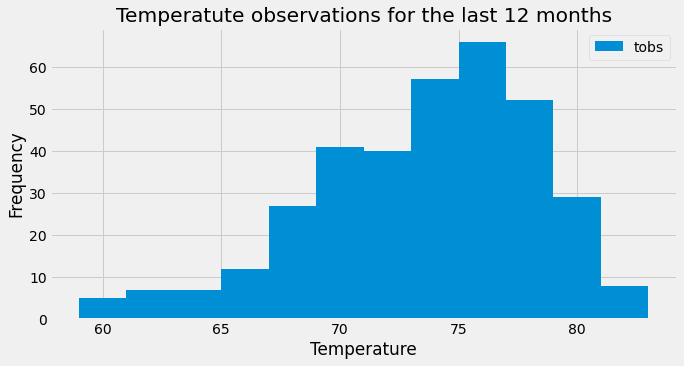

In [30]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
past_year_data = session.query(Measurement.date, Measurement.tobs).\
                 filter(Measurement.date > date_oneyear_from_lastdate).\
                 filter(Measurement.station == most_active_station).\
                 order_by(Measurement.date).\
                 all()
#Converting the past year data into a dataframe
df_pastyear = pd.DataFrame(past_year_data).set_index('date').sort_index(ascending = True)
# Results in a histogram
df_pastyear.plot(kind='hist', bins=12, figsize=(10,5),title='Temperatute observations for the last 12 months').set_xlabel('Temperature')
plt.savefig("Images/Tobs.png")
plt.show()

# Close session

In [21]:
# Close Session
session.close()